Mean Squared Error: 4.647549829824725
R-squared: 0.6969579616820708


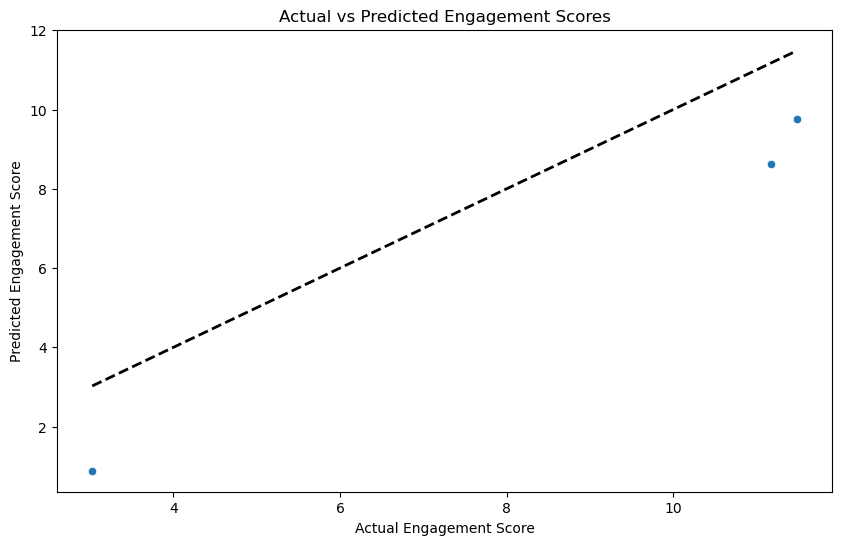

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
file_path = 'Tweet_engagement.csv'
data = pd.read_csv(file_path)

# Clean and restructure the data
cleaned_data = data.iloc[3:, 1:9]
cleaned_data.columns = ['Luxury Brand', 'Twitter Account', 'Account Creation Date', 
                        'Number of Followers', 'Number of Following Accounts', 
                        'Number of Firm Tweets', 'Mention', 'Engagement Score']

# Convert numerical columns from string to numeric
numeric_cols = ['Number of Followers', 'Number of Following Accounts', 
                'Number of Firm Tweets', 'Mention', 'Engagement Score']
for col in numeric_cols:
    cleaned_data[col] = cleaned_data[col].str.replace(',', '').astype(float)

# Remove rows with missing values
cleaned_data = cleaned_data.dropna()

# Select independent and dependent variables
X = cleaned_data[['Number of Followers', 'Number of Firm Tweets', 'Mention']]
y = cleaned_data['Engagement Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Line of best fit
plt.xlabel('Actual Engagement Score')
plt.ylabel('Predicted Engagement Score')
plt.title('Actual vs Predicted Engagement Scores')
plt.show()
